In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score     # TP/(TP+FP)
                                                #  T F F T F T F (Actual class)
                                                #  + + + + + + + (Your claim)
                                                # ✓ X X ✓ X ✓ X (Correct or wrong)
            
                                                # How many truth did you predict
                                                # correctly out of all you "True class claims"
                    
from sklearn.metrics import recall_score        # TP/(TP+FN)
                                                #  T T T T T T T (Actual class)
                                                #  + - - + - + - (Your claim)
                                                # ✓ X X ✓ X ✓ X (Correct or wrong)
            
                                                # How many truth did you predict out
                                                # of all the "Actual True class"
from sklearn.metrics import f1_score            #2 x (precision x recall/ (precision + recall)
from sklearn import metrics

In [2]:
#Set the style, colour code, font scale of the sns plot

sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1.5)

In [6]:
data_train = pd.read_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\train.csv")
data_train.shape

(891, 12)

In [17]:
data_test = pd.read_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\test.csv")
data_test.shape

(418, 11)

In [22]:
sur = np.array(0)
data_test['Survived'] = sur

array(0)

### EXPLORATORY DATA ANALYSIS

In [21]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [7]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data_train.Embarked.value_counts() 
# Ports

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# Analysing the distinctive numerical columns
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Here about 160-170 values of age is missing...So lets replace it with the mean age

In [14]:
#Check missing values
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
# concatinating the training and testing data for EDA
data_train["Source"] = "Train"
data_test["Source"] = "Test"
data = pd.concat([data_train,data_test])

In [65]:
data.shape

(1309, 13)

In [66]:
### cabin has a lot of missing data...better we can remove it
data = data.drop('Cabin', axis = 1)

In [67]:
#dropping irrelevent data such as: Name, ticket no. , passenger ID
data = data.drop(['PassengerId','Name','Ticket'],axis = 1)

In [68]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Source
0,0,3,male,22.0,1,0,7.2500,S,Train
1,1,1,female,38.0,1,0,71.2833,C,Train
2,1,3,female,26.0,0,0,7.9250,S,Train
3,1,1,female,35.0,1,0,53.1000,S,Train
4,0,3,male,35.0,0,0,8.0500,S,Train


In [69]:
# finding mean age at passenger class 1, 2, 3
data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.421053,39.144650,0.436533,0.365325,87.508992
2,0.314079,29.506434,0.393502,0.368231,21.179196
3,0.167842,24.812873,0.568406,0.400564,13.302889


In [70]:
# lets write a function to find the age of a person that is null in the table
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        if Pclass == 2:
            return 29.5
        if Pclass == 3:
            return 24.8
    else:
        return Age

### .apply() takes a function and applies to all the rows of a data frame

In [71]:
data['Age'] = data[['Age','Pclass']].apply(age_approx, axis = 1)

In [72]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    2
Source      0
dtype: int64

In [73]:
data.shape

(1309, 9)

In [74]:
data.dropna(inplace = True)

In [75]:
data.shape

(1306, 9)

In [60]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Source      0
dtype: int64

In [77]:
## Label encoding
data_dummied = pd.get_dummies(data,columns = ["Sex","Embarked"])

In [78]:
data_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Source,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,Train,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,Train,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Train,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,Train,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Train,0,1,0,0,1


In [81]:
## All the tuning of data is done....time to convert the test and train data 
## back to its true shape

In [95]:
data_train = data_dummied.loc[data["Source"] =="Train"]
data_test = data_dummied.loc[data["Source"] =="Test"]

In [96]:
data_train = data_train.drop('Source',axis = 1)
data_test = data_test.drop('Source',axis = 1)

In [97]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

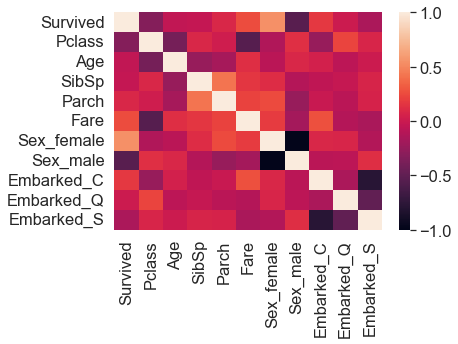

In [98]:
### To find which variables are correlated...we use HEAT MAP
plt.figure(figsize=(6,4))
sns.heatmap(data_train.corr())

### There is a stong +ve correlation between the female and the survived variables

### Whereas the fare doesnt affect survivability much

In [103]:
used_features = ["Pclass", "Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

x = data_train[used_features]
y = data_train['Survived']

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.3, random_state = 56)

In [108]:
X_train.shape

(622, 9)

In [109]:
X_test.shape

(267, 9)

In [111]:
Y_train.shape

(622,)

In [110]:
Y_test.shape

(267,)

In [116]:
LogReg = LogisticRegression(max_iter = 200)

In [117]:
LogReg.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [118]:
y_pred = LogReg.predict(X_test)

In [120]:
confusion_matrix(Y_test,y_pred)

array([[143,  16],
       [ 36,  72]], dtype=int64)

In [121]:
accuracy_score(Y_test,y_pred)

0.8052434456928839

In [122]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       159
           1       0.82      0.67      0.73       108

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [124]:
### Making predictions
res = LogReg.predict(data_test[used_features])

In [125]:
res.shape

(417,)

In [130]:
res

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [133]:
data_test['Survived'] = res.tolist()

In [135]:
data_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,0,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [136]:
data_test.to_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\Titanic_Predictions.csv")